In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("../data/raw/SpeedDating.csv",delimiter=",",decimal=".",thousands=",")
df.head()

iid   id  gender  idg  condtn  wave  round  position  positin1  order  \
0    1  1.0       0    1       1     1     10         7       NaN      4   
1    1  1.0       0    1       1     1     10         7       NaN      3   
2    1  1.0       0    1       1     1     10         7       NaN     10   
3    1  1.0       0    1       1     1     10         7       NaN      5   
4    1  1.0       0    1       1     1     10         7       NaN      7   

   partner   pid  match  int_corr  samerace  age_o  race_o  pf_o_att  \
0        1  11.0      0      0.14         0   27.0     2.0      35.0   
1        2  12.0      0      0.54         0   22.0     2.0      60.0   
2        3  13.0      1      0.16         1   22.0     4.0      19.0   
3        4  14.0      1      0.61         0   23.0     2.0      30.0   
4        5  15.0      1      0.21         0   24.0     3.0      30.0   

   pf_o_sin  pf_o_int  pf_o_fun  pf_o_amb  pf_o_sha  dec_o  attr_o  sinc_o  \
0      20.0      20.0      20.0       0.0       5.0      0     6.0     8.0   
1       0.0       0.0      40.0       0.0       0.0      0     7.0     8.0   
2      18.0      19.0      18.0      14.0      12.0      1    10.0    10.0   
3       5.0      15.0      40.0       5.0       5.0      1     7.0     8.0   
4      10.0      20.0      10.0      10.0      20.0      1     8.0     7.0   

   intel_o  fun_o  amb_o  shar_o  like_o  prob_o  met_o   age field  field_cd  \
0      8.0    8.0    8.0     6.0     7.0     4.0    2.0  21.0   Law       1.0   
1     10.0    7.0    7.0     5.0     8.0     4.0    2.0  21.0   Law       1.0   
2     10.0   10.0   10.0    10.0    10.0    10.0    1.0  21.0   Law       1.0   
3      9.0    8.0    9.0     8.0     7.0     7.0    2.0  21.0   Law       1.0   
4      9.0    6.0    9.0     7.0     8.0     6.0    2.0  21.0   Law       1.0   

  undergra  mn_sat  tuition  race  imprace  imprelig     from  zipcode  \
0      NaN     NaN      NaN   4.0      2.0       4.0  Chicago  60521.0   
1      NaN     NaN      NaN   4.0      2.0       4.0  Chicago  60521.0   
2      NaN     NaN      NaN   4.0      2.0       4.0  Chicago  60521.0   
3      NaN     NaN      NaN   4.0      2.0       4.0  Chicago  60521.0   
4      NaN     NaN      NaN   4.0      2.0       4.0  Chicago  60521.0   

    income  goal  date  go_out  career  career_c  sports  tvsports  exercise  \
0  69487.0   2.0   7.0     1.0  lawyer       NaN     9.0       2.0       8.0   
1  69487.0   2.0   7.0     1.0  lawyer       NaN     9.0       2.0       8.0   
2  69487.0   2.0   7.0     1.0  lawyer       NaN     9.0       2.0       8.0   
3  69487.0   2.0   7.0     1.0  lawyer       NaN     9.0       2.0       8.0   
4  69487.0   2.0   7.0     1.0  lawyer       NaN     9.0       2.0       8.0   

   dining  museums  art  hiking  gaming  clubbing  reading   tv  theater  \
0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0      1.0   
1     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0      1.0   
2     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0      1.0   
3     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0      1.0   
4     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0      1.0   

   movies  concerts  music  shopping  yoga  exphappy  expnum  attr1_1  \
0    10.0      10.0    9.0       8.0   1.0       3.0     2.0     15.0   
1    10.0      10.0    9.0       8.0   1.0       3.0     2.0     15.0   
2    10.0      10.0    9.0       8.0   1.0       3.0     2.0     15.0   
3    10.0      10.0    9.0       8.0   1.0       3.0     2.0     15.0   
4    10.0      10.0    9.0       8.0   1.0       3.0     2.0     15.0   

   sinc1_1  intel1_1  fun1_1  amb1_1  shar1_1  attr4_1  sinc4_1  intel4_1  \
0     20.0      20.0    15.0    15.0     15.0      NaN      NaN       NaN   
1     20.0      20.0    15.0    15.0     15.0      NaN      NaN       NaN   
2     20.0      20.0    15.0    15.0     15.0      NaN      NaN       NaN   
3     20.0      20.0    15.

In [3]:
df["undergra"].fillna("No Undergrad",inplace=True)
df["mn_sat"].fillna(0,inplace=True)
df["tuition"].fillna(0,inplace=True)

In [4]:
df["tuition"].unique()
incomedf=df.copy()
incomedf["career"]= incomedf["career"].str.lower()


In [5]:
incomedf.loc[(incomedf["pid"]==552) & (incomedf["match"]==1)]

iid    id  gender  idg  condtn  wave  round  position  positin1  order  \
7431  509   1.0       0    1       2    21     22        21      21.0     12   
7453  510   2.0       0    3       2    21     22        12      12.0      3   
7519  513   5.0       0    9       2    21     22        22      22.0     13   
7563  515   7.0       0   13       2    21     22        10      10.0      1   
7585  516   8.0       0   15       2    21     22        18      18.0      9   
7761  524  16.0       0   31       2    21     22        11      11.0      2   

      partner    pid  match  int_corr  samerace  age_o  race_o  pf_o_att  \
7431       22  552.0      1      0.68         0   25.0     2.0      70.0   
7453       22  552.0      1      0.63         0   25.0     2.0      70.0   
7519       22  552.0      1      0.55         1   25.0     2.0      70.0   
7563       22  552.0      1      0.39         1   25.0     2.0      70.0   
7585       22  552.0      1      0.59         0   25.0     2.0      70.0   
7761       22  552.0      1      0.59         0   25.0     2.0      70.0   

      pf_o_sin  pf_o_int  pf_o_fun  pf_o_amb  pf_o_sha  dec_o  attr_o  sinc_o  \
7431       0.0      15.0      15.0       0.0       0.0      1     7.0     7.0   
7453       0.0      15.0      15.0       0.0       0.0      1     9.0     9.0   
7519       0.0      15.0      15.0       0.0       0.0      1     8.0     9.0   
7563       0.0      15.0      15.0       0.0       0.0      1     7.0     NaN   
7585       0.0      15.0      15.0       0.0       0.0      1     8.0     7.0   
7761       0.0      15.0      15.0       0.0       0.0      1     8.0     7.0   

      intel_o  fun_o  amb_o  shar_o  like_o  prob_o  met_o   age  \
7431      9.0    8.0    9.0     7.0     8.0     5.0    2.0  28.0   
7453      9.0    9.0    NaN     7.0     9.0     8.0    2.0  26.0   
7519      9.0    9.0    6.0     8.0     9.0     6.0    NaN  23.0   
7563      5.0    5.0    5.0     4.0     8.0     7.0    2.0  23.0   
7585      8.0    9.0    8.0     8.0     8.0     6.0    2.0  27.0   
7761      8.0    8.0    NaN     NaN     7.0     6.0    2.0  25.0   

                                    field  field_cd  \
7431                           journalism       6.0   
7453                             Business       8.0   
7519                   MFA Acting Program      15.0   
7563                   Nonfiction writing       6.0   
7585  Biochemistry & Molecular Biophysics      10.0   
7761                             medicine       4.0   

                                     undergra  mn_sat  tuition  race  imprace  \
7431                                      NYU  1340.0  25380.0   4.0      2.0   
7453                     Universidad de Chile     0.0      0.0   3.0      3.0   
7519                         Tufts University     0.0  26892.0   2.0      1.0   
7563                     University of Kansas     0.0   9811.0   2.0      8.0   
7585  California State University Los Angeles     0.0   9162.0   4.0      9.0   
7761                      Columbia University  1430.0  26908.0   4.0      9.0   

      imprelig        from  zipcode   income  goal  date  go_out  \
7431       2.0     working  10594.0      NaN   2.0   4.0     2.0   
7453       3.0       Chile      NaN      NaN   2.0   7.0     2.0   
7519       1.0     Florida  33418.0  50572.0   2.0   6.0     4.0   
7563       5.0      Kansas  67111.0  20000.0   1.0   6.0     3.0   
7585       3.0  California  91754.0  32508.0   2.0   6.0     3.0   
7761       6.0    Michigan  48306.0  72412.0   2.0   7.0     4.0   

                    career  career_c  sports  tvsports  exercise  dining  \
7431            journalism      16.0     6.0       3.0       6.0     7.0   
7453             professor       2.0     8.0       1.0       4.0    10.0   
7519               actress       6.0     1.0       1.0       9.0     9.0   
7563     writer/journalist      16.0    10.0      10.0       8.0     9.0   
7585             scientist       2.0     3.0       3.0  

In [6]:
df.drop(["iid","id","pid","idg","zipcode","tuition","income","mn_sat"],axis=1,inplace=True)

<AxesSubplot: >

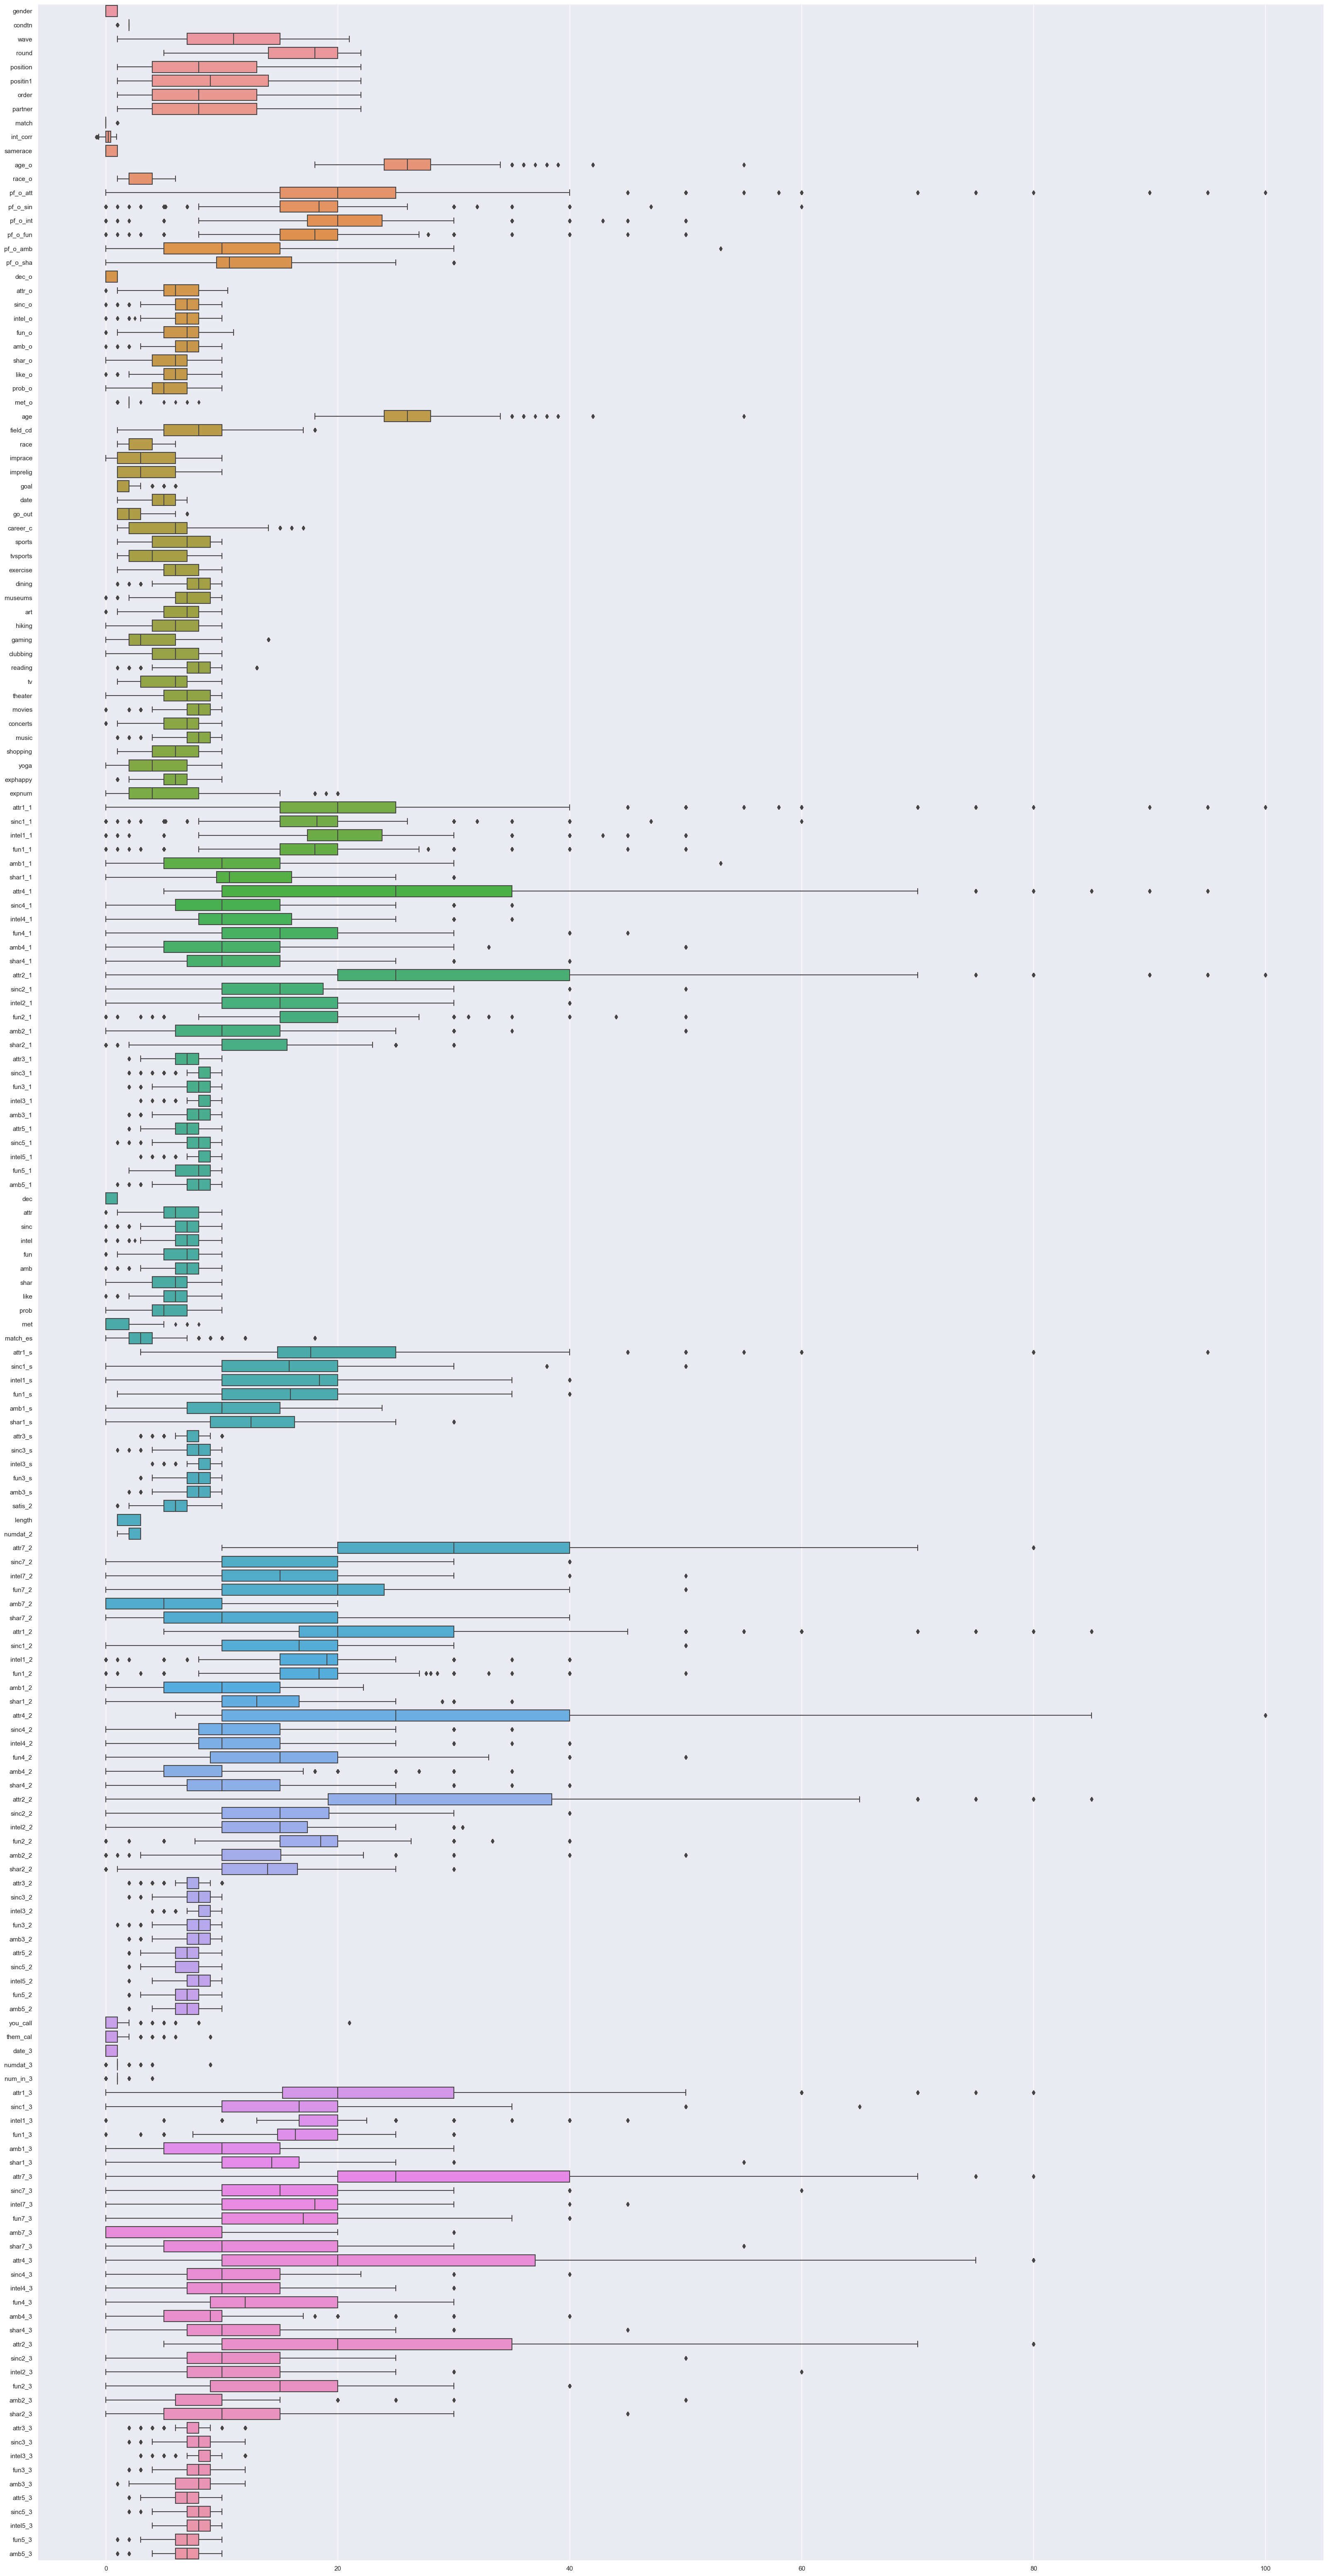

In [7]:
sns.set(rc={'figure.figsize':(40,80)})
sns.boxplot(df,orient="h")


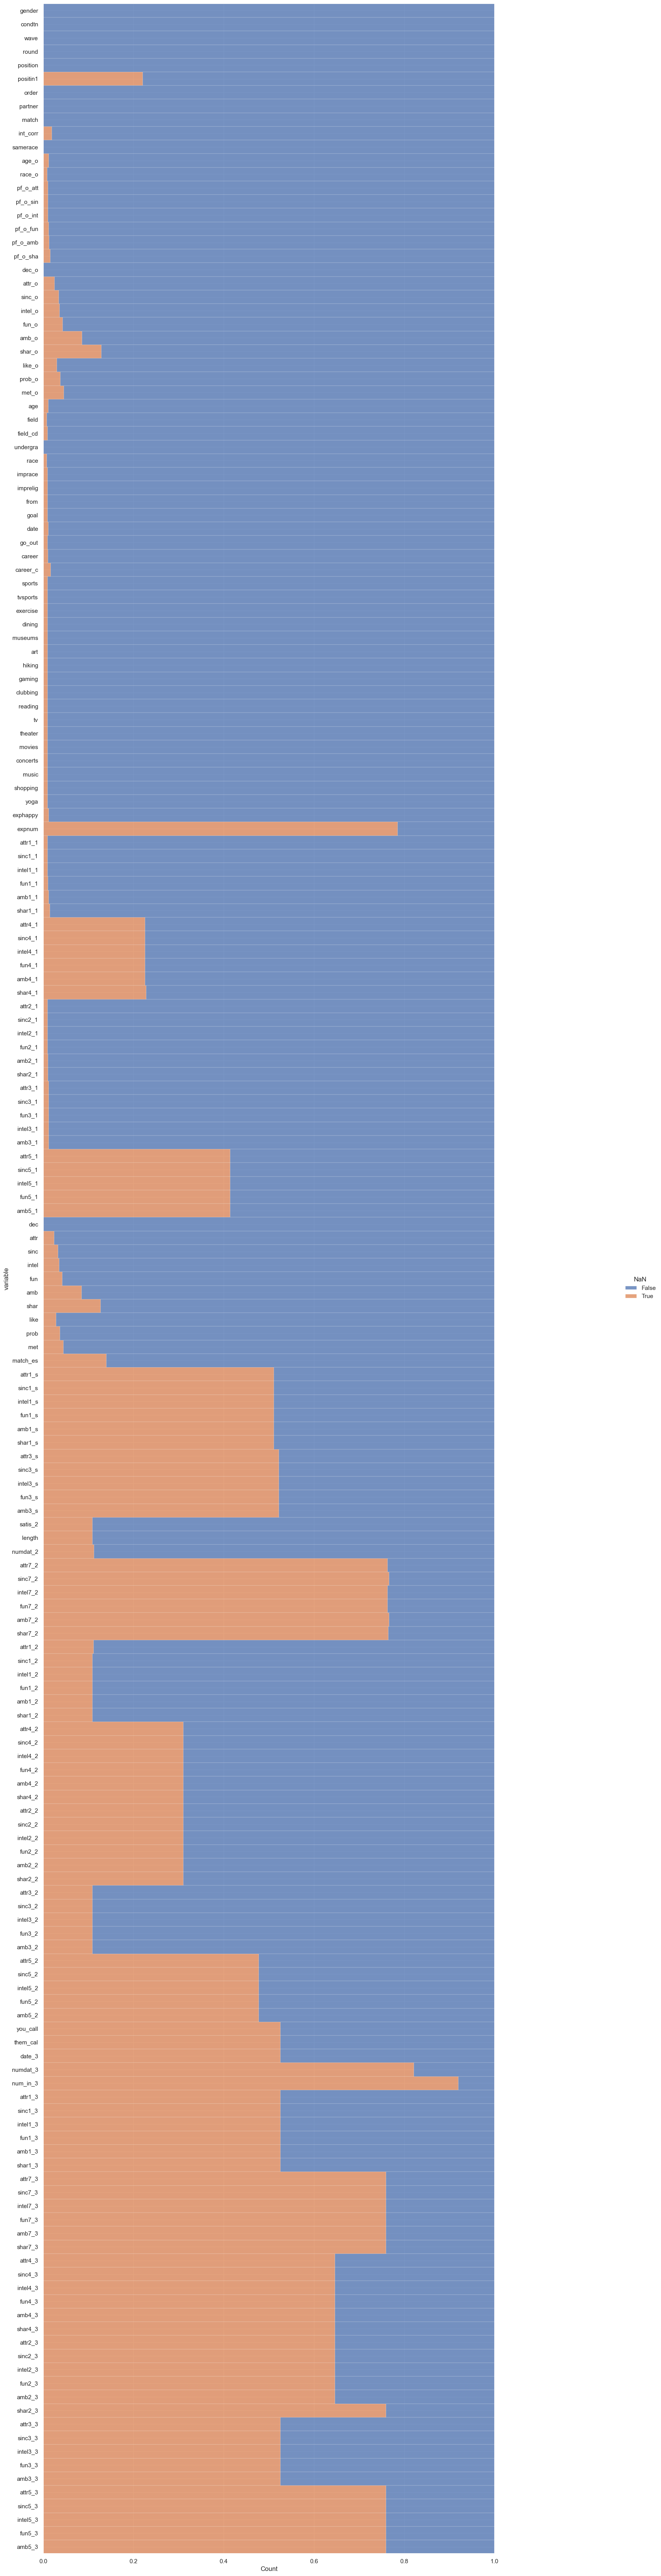

In [8]:
sns.set(rc={'figure.figsize':(20,10)})
g=sns.displot(
    data=df.isna().melt(value_name="NaN"),
    y="variable",
    hue="NaN",
    multiple="fill",
)
g.figure.set_figwidth(20)
g.figure.set_figheight(80) 

In [9]:
x=["sports","tvsports","exercise","dining","museums","art","hiking","gaming","clubbing","reading","tv","theater","movies","concerts","music","shopping","yoga"]
s=sns.boxplot(incomedf[["income","career","match","gender"]],x="income",y="career",hue="gender")
s.figure.set_figwidth(20)
s.figure.set_figheight(350) 

In [10]:
d=sns.barplot(incomedf[["income","career","match","gender"]],x="income",y="career",hue="gender")
d.figure.set_figwidth(20)
d.figure.set_figheight(350) 

c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
c:\Users\Sscho\anaconda3\